In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000893847"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000893847
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,"HAWTHORN BANCSHARES, INC."
Ticker,HWBK


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,10.0,1.612400e+01,5.938799e-01,15.38,1.576750e+01,16.14,1.640250e+01,17.38
interest income,34.0,1.407929e+07,2.623212e+06,10963000.00,1.155675e+07,13563338.00,1.600444e+07,18992167.00
net income,34.0,1.619628e+06,9.873513e+05,-1572000.00,1.232581e+06,1690500.00,2.071050e+06,4666000.00
net interest income,34.0,1.016273e+07,6.244744e+05,9085017.00,9.750500e+06,10007201.50,1.068563e+07,11629000.00
provision for loan losses,34.0,9.966633e+05,1.043704e+06,0.00,1.719120e+05,737500.00,1.687500e+06,4700000.00


# Plots

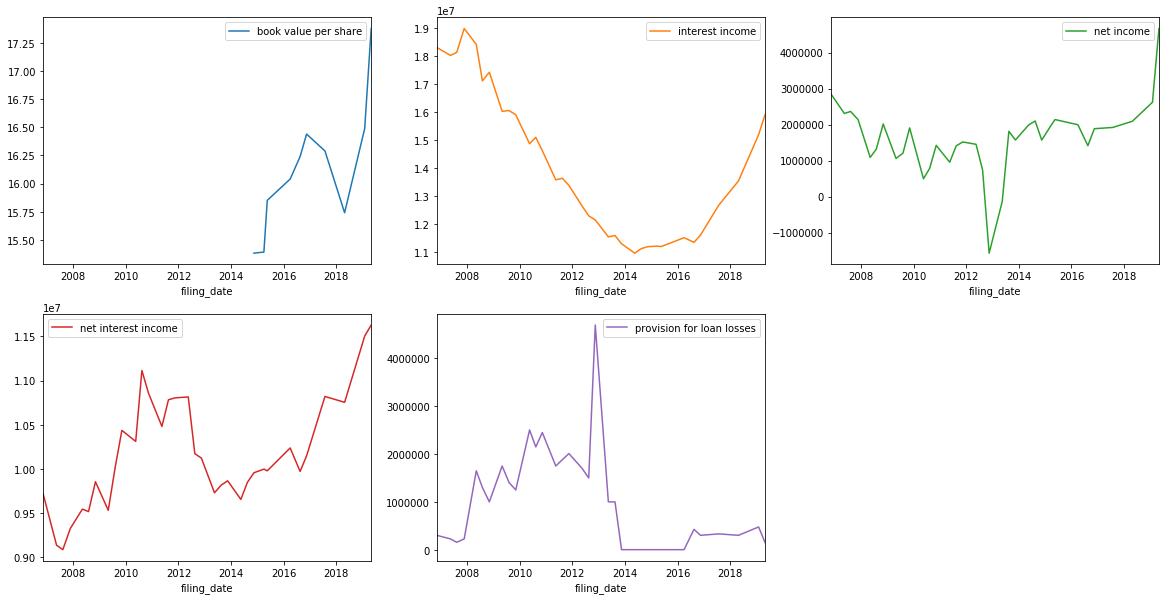

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000893847 book value per share       2006Q3 to 2014Q2: 32 periods  missing   
           book value per share        2015Q2 to 2015Q3: 2 periods  missing   
           book value per share                             2016Q1  missing   
           book value per share        2016Q4 to 2017Q1: 2 periods  missing   
           book value per share        2017Q3 to 2017Q4: 2 periods  missing   
           book value per share        2018Q2 to 2018Q3: 2 periods  missing   
           interest income                                  2006Q4  missing   
           interest income                                  2007Q4  missing   
           interest income                                  2008Q4  missing   
           interest income                                  2009Q4  missing   
           interest income                                  2010Q4  missing   
           interest income                                  2011Q4  missing   
           interest income                                  2012Q4  missing   
           interest income                                  2013Q4  missing   
           interest income             2015Q2 to 2015Q3: 2 periods  missing   
           interest income                                  2016Q1  missing   
           interest income             2016Q4 to 2017Q1: 2 periods  missing   
           interest income             2017Q3 to 2017Q4: 2 periods  missing   
           interest income             2018Q2 to 2018Q3: 2 periods  missing   
           net income                                       2006Q4  missing   
           net income                                       2007Q4  missing   
           net income                                       2008Q4  missing   
           net income                                       2009Q4  missing   
           net income                                       2010Q4  missing   
           net income                                       2011Q4  missing   
           net income                                       2012Q4  missing   
           net income                                       2013Q4  missing   
           net income                  2015Q2 to 2015Q3: 2 periods  missing   
           net income                                       2016Q1  missing   
           net income                  2016Q4 to 2017Q1: 2 periods  missing   
           net income                  2017Q3 to 2017Q4: 2 periods  missing   
           net income                  2018Q2 to 2018Q3: 2 periods  missing   
           net interest income                              2006Q4  missing   
           net interest income                              2007Q4  missing   
           net interest income                              2008Q4  missing   
           net interest income                              2009Q4  missing   
           net interest income                              2010Q4  missing   
           net interest income                              2011Q4  missing   
           net interest income                              2012Q4  missing   
           net interest income                              2013Q4  missing   
           net interest income         2015Q2 to 2015Q3: 2 periods  missing   
           net interest income                              2016Q1  missing   
           net interest income         2016Q4 to 2017Q1: 2 periods  missing   
           net interest income         2017Q3 to 2017Q4: 2 periods  missing   
           net interest income         2018Q2 to 2018Q3: 2 periods  missing   
           provision for loan losses                        2006Q4  missing   
           provision for loan losses                        2007Q4  missing   
           provision for loan losses                        2008Q4  missing   
           provision for loan losses                        2009Q4  missing   
           provision for loan l

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()